In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle
from scipy.signal import convolve
import sys

/user/sebert/home/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib64/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load stimulus code

sys.path.insert(1, '/user/sebert/home/Documents/Repositories/motion/anticipation_1D')
from stimuli import stim_moving_object_for_2D_net

In [3]:
speeds = [0.81]


In [4]:
dataABs = []
cell = 150

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_mono_linear_plastic_opt/noGCGainControl/betaA/betaA_0.03/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed']
    dataABs.append([time,out['RG'][:]])

    if s == 0.81:
        outdABs = out


0.81


In [5]:
dataAB = []
cell = 150

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_mono_linear_plastic_opt/noGCGainControl/betaA/betaA_0.03/onset_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = np.arange(0,duration,dt) - 1#+45
    dataAB.append([time,out['RG'][:]])

    if s == 0.81:
        outdAB = out


0.81


In [6]:
dataABr = []
cell = 150

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_mono_linear_plastic_opt/noGCGainControl/betaA/betaA_0.03/reversing_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = np.arange(0,duration,dt) - 1#+45
    dataABr.append([time,out['RG'][:]])

    if s == 0.81:
        outdABr = out


0.81


In [7]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 4
ms = 60

figsize_ratio = 3


image_format = "png"
dpi = 300

shades_of_blue = plt.get_cmap('gist_gray',9)


In [8]:
# make stimuli
# create stimulus
stimulus_maker = stim_moving_object_for_2D_net(paramsi,
                                                    filepath = None)


baro = stimulus_maker.bar_onset()

barr = stimulus_maker.bar_reversing()

In [9]:
%matplotlib qt


ModuleNotFoundError: No module named 'matplotlib.backends.backend_qt5agg'

Text(0, 0.5, '$R(t)$')

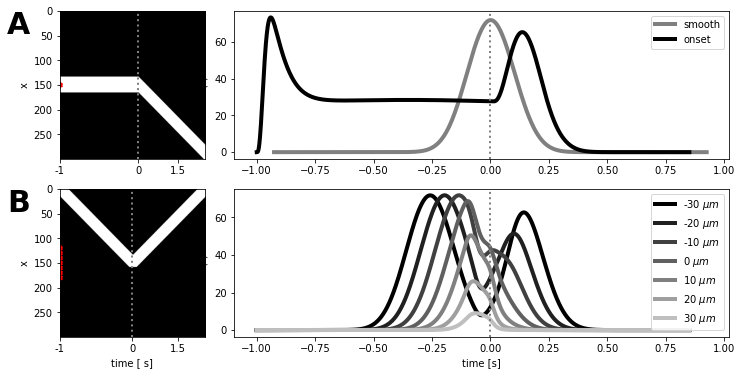

In [22]:
rev_pos = 150
dis = 10 


#initialize figure
nrows = 2
ncols = 4

fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)


ax = fig.add_subplot(gs[0,0])
ax.text(-0.2,1.0, "A", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
#ax.axis('square')
ax.imshow(baro, aspect = 'auto', cmap = 'gist_gray')
ax.set_ylabel('x')


x_label_list = ['-1', '0', '1.5']

ax.set_xticks([0,1000,1500])
ax.axvline(1000,linestyle = ':', color = 'grey', linewidth =2 )
ax.scatter(0,150,linestyle = ':', color = 'r' )

ax.set_xticklabels(x_label_list)


#ax.set_ylim(0,150)
ax = fig.add_subplot(gs[1,0])
ax.text(-0.2,1.0 ,"B", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
ax.imshow(barr, aspect = 'auto', cmap = 'gist_gray')
x_label_list = ['-1', '0', '1.5']
x = paramsi['start_cell']*paramsi['spacing']/paramsi['speed']/paramsi['dt']
ax.axvline(x,linestyle = ':', color = 'grey', linewidth =2 )

for i in range(-3,4):

    ax.scatter(0,rev_pos+i*dis,linestyle = ':', color = 'r' )

ax.set_xticks([0,x,1500])
ax.set_xticklabels(x_label_list)

ax.set_ylabel('x')
ax.set_xlabel('time [ s]')
ax = fig.add_subplot(gs[0,1:])

ax.plot(dataABs[0][0], outdABs['RG'][:], color = 'grey', linewidth = lw, label = 'smooth')
ax.plot(dataAB[0][0], outdAB['RG'][:], color = 'k', linewidth = lw, label = 'onset')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax.legend()
ax.set_ylabel ('$R(t)$')

ax = fig.add_subplot(gs[1,1:], sharex = ax)


for i in range(-3,4):
    ax.plot(dataABr[0][0],outdABr['RG'][rev_pos+i*dis,:], color = shades_of_blue(i+3), linewidth = lw, label = f'{i*dis} $\mu m$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax.legend()

ax.set_xlabel ('time [s]')
ax.set_ylabel ('$R(t)$')